# For finding video files and audio files durations 

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import os
import librosa
import cv2


# Collect durations for audio and video
audio_durations = []
video_durations = []

video_folder = "dataset/video_only"
audio_folder = "dataset/audio_only"


def get_audio_duration(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    return len(y) / sr

def get_video_duration(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)  
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)  
    cap.release()
    
    if fps > 0:
        return total_frames / fps
    return 0

# Process video files
for video_file in os.listdir(video_folder):
    if video_file.endswith(".mp4"):
        video_path = os.path.join(video_folder, video_file)
        video_duration = get_video_duration(video_path)
        video_durations.append(round(video_duration))

# Process audio files
for audio_file in os.listdir(audio_folder):
    if audio_file.endswith(".wav"):
        audio_path = os.path.join(audio_folder, audio_file)
        audio_duration = get_audio_duration(audio_path)
        audio_durations.append(round(audio_duration))

# Count occurrences of each duration
audio_duration_counts = Counter(audio_durations)
video_duration_counts = Counter(video_durations)
print("         sec  files_count")
print(audio_duration_counts)
print(video_duration_counts)


         sec  files_count
Counter({20: 45})
Counter({20: 45})


# Preprocessing audio file 

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def get_high_frequency_peaks(audio_path, threshold=0.8):

    # Load audio
    y, sr = librosa.load(audio_path, sr=None)

    # Compute the Short-Time Fourier Transform (STFT)
    S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))

    # Convert to dB scale
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    # Find the mean energy across frequencies at each time step
    avg_energy = np.mean(S_db, axis=0)

    # Normalize energy (0-1 scale)
    norm_energy = (avg_energy - np.min(avg_energy)) / (np.max(avg_energy) - np.min(avg_energy))

    # Detect peaks (collision events)
    peaks, _ = find_peaks(norm_energy, height=threshold)

    # Convert peak indices to time
    peak_times = librosa.frames_to_time(peaks, sr=sr, hop_length=512)

    return peak_times, norm_energy, sr



# plotting example audio file 

Collision peak times (seconds): [ 1.632  2.72   4.864  5.824  8.096  8.864 11.328 11.872 14.56  14.88
 17.824]


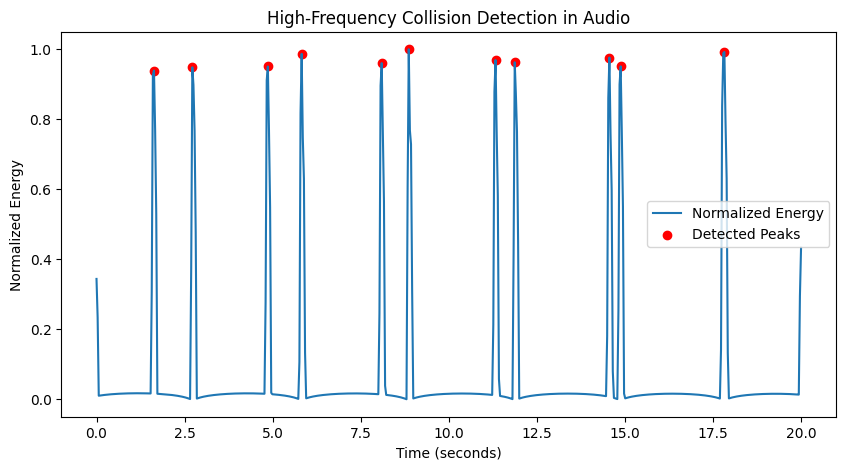

In [ ]:

audio_file = "dataset/audio_only/audio_only_ID_1.wav"
peak_times, norm_energy, sr = get_high_frequency_peaks(audio_file, threshold=0.8)

print("Collision peak times (seconds):", peak_times)

# Plot energy signal with peaks
plt.figure(figsize=(10, 5))
plt.plot(librosa.frames_to_time(np.arange(len(norm_energy)), sr=sr, hop_length=512), norm_energy, label="Normalized Energy")
plt.scatter(peak_times, [norm_energy[librosa.time_to_frames(t, sr=sr, hop_length=512)] for t in peak_times], color='red', label="Detected Peaks")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Energy")
plt.title("High-Frequency Collision Detection in Audio")
plt.legend()
plt.show()

In [7]:
from IPython.display import Audio

# Play the audio file
Audio(audio_file)

# Extracting all peak_time values from audio files 

In [ ]:
import os

audio_folder = "dataset/audio_only"
audiocollision_processed = {}

# Iterate through all audio files in the folder
for audio_file in os.listdir(audio_folder):
    if audio_file.endswith(".wav"):
        audio_path = os.path.join(audio_folder, audio_file)
        print(f"Processing audio: {audio_file}")
        
        # Detect collision peak times for the current audio file
        peak_times, _, _ = get_high_frequency_peaks(audio_path, threshold=0.8)
        audiocollision_processed[audio_file] = peak_times.tolist()


print("\nAudio Collision Processed:")
for audio_name, collisions in audiocollision_processed.items():
    print(f"{audio_name}: {collisions}")

Processing audio: audio_only_ID_1.wav
Processing audio: audio_only_ID_10.wav
Processing audio: audio_only_ID_11.wav
Processing audio: audio_only_ID_12.wav
Processing audio: audio_only_ID_13.wav
Processing audio: audio_only_ID_14.wav
Processing audio: audio_only_ID_15.wav
Processing audio: audio_only_ID_16.wav
Processing audio: audio_only_ID_17.wav
Processing audio: audio_only_ID_18.wav
Processing audio: audio_only_ID_19.wav
Processing audio: audio_only_ID_2.wav
Processing audio: audio_only_ID_20.wav
Processing audio: audio_only_ID_21.wav
Processing audio: audio_only_ID_22.wav
Processing audio: audio_only_ID_23.wav
Processing audio: audio_only_ID_24.wav
Processing audio: audio_only_ID_25.wav
Processing audio: audio_only_ID_26.wav
Processing audio: audio_only_ID_27.wav
Processing audio: audio_only_ID_28.wav
Processing audio: audio_only_ID_29.wav
Processing audio: audio_only_ID_3.wav
Processing audio: audio_only_ID_30.wav
Processing audio: audio_only_ID_31.wav
Processing audio: audio_only

# plotting all peaks of audio files 

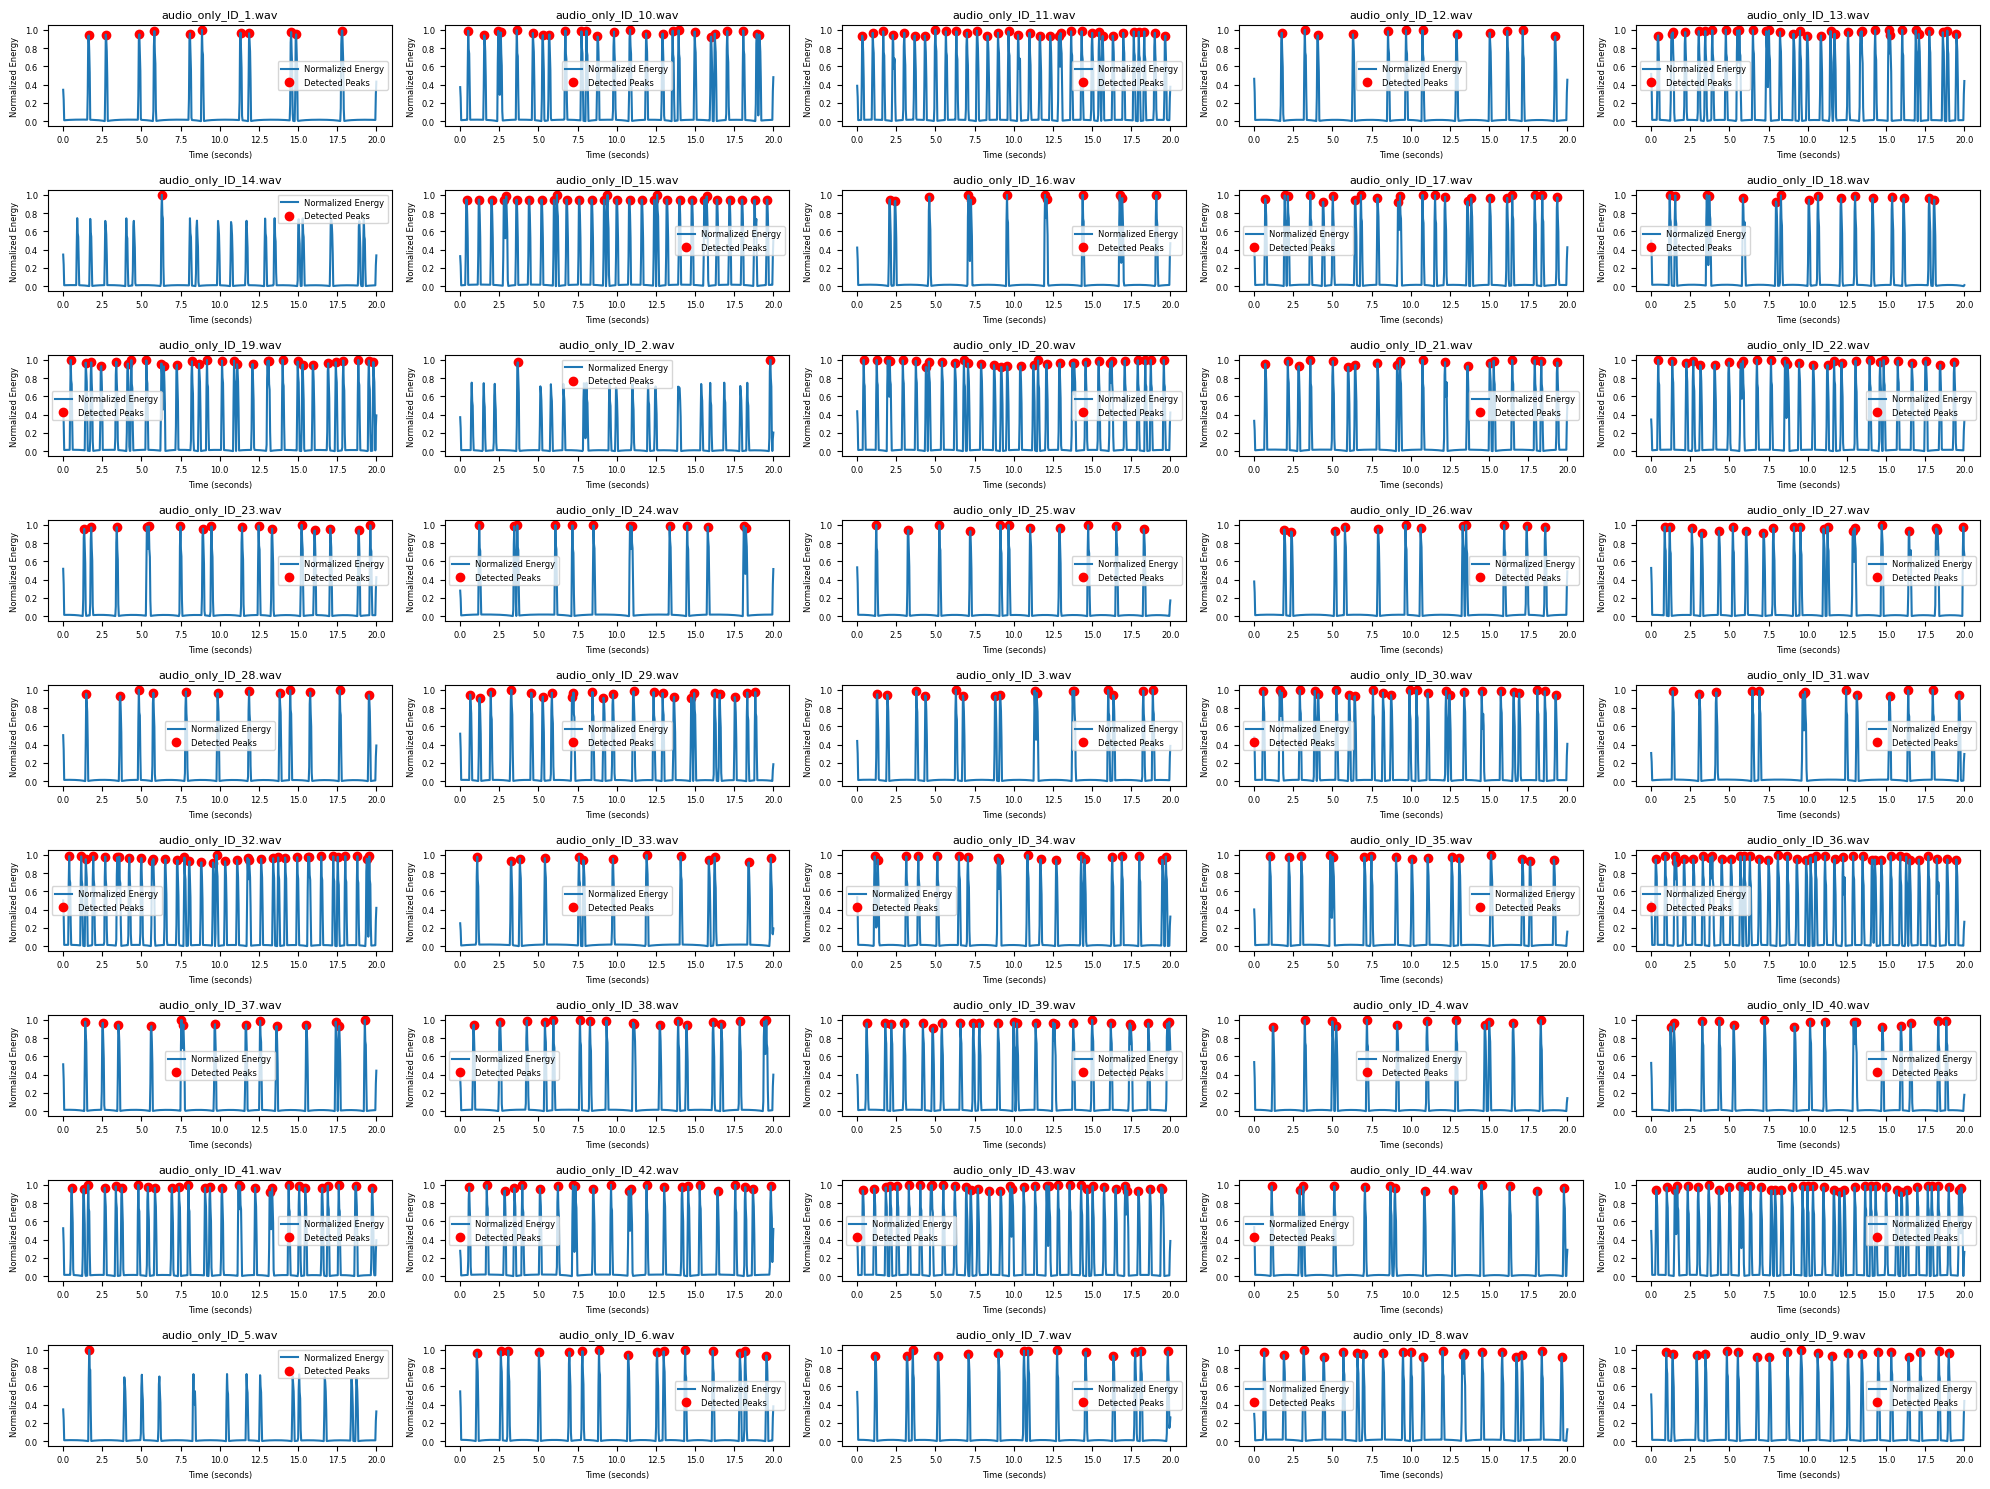

In [ ]:
import os
import numpy as np
import librosa

import matplotlib.pyplot as plt

audio_folder = "dataset/audio_only"
audio_files = [f for f in os.listdir(audio_folder) if f.endswith(".wav")]

fig, axes = plt.subplots(9, 5, figsize=(20, 15))
axes = axes.flatten()

# Iterate through audio files and plot each
for idx, audio_file in enumerate(audio_files):
    if idx >= len(axes): 
        break

    audio_path = os.path.join(audio_folder, audio_file)
    peak_times, norm_energy, sr = get_high_frequency_peaks(audio_path, threshold=0.8)

    # Plot energy signal with peaks
    axes[idx].plot(librosa.frames_to_time(np.arange(len(norm_energy)), sr=sr, hop_length=512), norm_energy, label="Normalized Energy")
    axes[idx].scatter(peak_times, [norm_energy[librosa.time_to_frames(t, sr=sr, hop_length=512)] for t in peak_times], color='red', label="Detected Peaks")
    axes[idx].set_title(audio_file, fontsize=8)
    axes[idx].set_xlabel("Time (seconds)", fontsize=6)
    axes[idx].set_ylabel("Normalized Energy", fontsize=6)
    axes[idx].tick_params(axis='both', which='major', labelsize=6)
    axes[idx].legend(fontsize=6)

# Hide any unused subplots
for ax in axes[len(audio_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# For Video Preprocessing  

In [10]:
import cv2
import numpy as np
import time

#### For detecting boundries where ball will collide

In [11]:
def detect_boundaries(cap):
    # Sample multiple frames to get a stable detection
    boundary_frames = 10
    frames = []
    
    for i in range(boundary_frames):
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    
    if not frames:
        return None
    
    first_frame = frames[0]
    gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    height, width = gray.shape
    
    # edge detection to find boundaries
    edges = cv2.Canny(gray, 50, 150)
    
    # Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=width/3, maxLineGap=20)
    
    # If Hough Lines method doesn't work well
    if lines is None or len(lines) < 4:
        print("Using alternative boundary detection method...")
        # Binary threshold to separate background and playing area
        _, binary = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
        
        # Find contours
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            # Find the largest contour 
            playing_area = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(playing_area)
            
            # Define boundaries
            boundaries = {
                "left": x,
                "right": x + w,
                "top": y,
                "bottom": y + h
            }
        else:
            # If no contours found, use frame dimensions with padding
            padding = 10
            boundaries = {
                "left": padding,
                "right": width - padding,
                "top": padding,
                "bottom": height - padding
            }
    else:
        horizontal_lines = []
        vertical_lines = []
        
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if abs(x2 - x1) > abs(y2 - y1):  # Horizontal line
                horizontal_lines.append((y1 + y2) / 2)  # Average y-coordinate
            else:  # Vertical line
                vertical_lines.append((x1 + x2) / 2)  # Average x-coordinate
        
        # If not enough lines detected, use frame edges
        if len(horizontal_lines) < 2 or len(vertical_lines) < 2:
            padding = 10
            boundaries = {
                "left": padding,
                "right": width - padding,
                "top": padding,
                "bottom": height - padding
            }
        else:
            horizontal_lines.sort()
            vertical_lines.sort()
            
            boundaries = {
                "top": max(int(min(horizontal_lines)), 0),
                "bottom": min(int(max(horizontal_lines)), height),
                "left": max(int(min(vertical_lines)), 0),
                "right": min(int(max(vertical_lines)), width)
            }
    
    # print(f"Detected boundaries: {boundaries}")
    return boundaries


##### define tracking ball 

In [12]:
import cv2
import numpy as np

def track_ball_collisions(cap, boundaries, fps):
    # print("Tracking ball and detecting collisions...")

    prev_positions = []
    collision_times = []
    frame_count = 0
    
    min_frames_between_collisions = int(fps / 16)           # Reduced delay to catch more collisions
    last_collision_frame = -min_frames_between_collisions
    base_collision_margin = 5                               # Base margin for slow movement
    

    lk_params = dict(winSize=(15, 15), maxLevel=2,
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    
    prev_gray = None
    prev_points = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([100, 150, 50])
        upper_blue = np.array([140, 255, 255])
        
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            c = max(contours, key=cv2.contourArea)
            M = cv2.moments(c)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                (_, _), radius = cv2.minEnclosingCircle(c)
                radius = int(radius)
                current_pos = (cx, cy, radius)

                prev_positions.append(current_pos)
                if len(prev_positions) > 10:
                    prev_positions.pop(0)

                # Estimate ball velocity
                if len(prev_positions) > 1:
                    prev_x, prev_y, _ = prev_positions[-2]
                    dx, dy = cx - prev_x, cy - prev_y
                    velocity = np.sqrt(dx**2 + dy**2)

                    # Adaptive collision margin
                    collision_margin = base_collision_margin + int(velocity * 0.2)

                    # Detect collisions
                    collision_detected = False
                    if (cx - radius) <= (boundaries["left"] + collision_margin) and dx < 0:
                        collision_detected = True
                    elif (cx + radius) >= (boundaries["right"] - collision_margin) and dx > 0:
                        collision_detected = True
                    elif (cy - radius) <= (boundaries["top"] + collision_margin) and dy < 0:
                        collision_detected = True
                    elif (cy + radius) >= (boundaries["bottom"] - collision_margin) and dy > 0:
                        collision_detected = True

                    if collision_detected and (frame_count - last_collision_frame) > min_frames_between_collisions:
                        timestamp = frame_count / fps
                        collision_times.append(timestamp)
                        last_collision_frame = frame_count
                        # print(f"Collision detected at {timestamp:.2f} sec")

        frame_count += 1
        # if frame_count % 100 == 0:
            # print(f"Processed {frame_count} frames...")

    return collision_times


### finding collisoin 

In [13]:
def detect_ball_collisions(video_path):

    cap = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return []
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # print(f"Video FPS: {fps}, Total frames: {total_frames}")
    
    # Detect boundaries from the first few frames
    boundaries = detect_boundaries(cap)
    
    if not boundaries:
        print("Error: Could not detect boundaries.")
        return []
    
    # Reset video to beginning
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    
    # Track ball movement and detect collisions
    collision_times = track_ball_collisions(cap, boundaries, fps)
 
 
    cap.release()
    cv2.destroyAllWindows()
    
    return collision_times


In [33]:
import os
collision_details = {}
def main():
    output_path = "collision_timestamps.txt"
    video_folder = "dataset/video_only"


    for video_file in os.listdir(video_folder):
        if video_file.endswith(".mp4"):
            video_path = os.path.join(video_folder, video_file)
            print(f"Processing video: {video_file}")
            
            # Detect collisions for the current video
            collisions = detect_ball_collisions(video_path)
            collision_details[video_file] = collisions

    # Save collision details to a file
    with open(output_path, 'w') as f:
        for video_file, timestamps in collision_details.items():
            f.write(f"{video_file}:\n")
            for time in timestamps:
                f.write(f"  {time:.2f}s\n")
            f.write("\n")


    print("\nCollision details:")
    for video_file, timestamps in collision_details.items():
        print(f"{video_file}: {timestamps}")

if __name__ == "__main__":
    main()

Processing video: video_only_ID_1.mp4
Processing video: video_only_ID_10.mp4
Processing video: video_only_ID_11.mp4
Processing video: video_only_ID_12.mp4
Processing video: video_only_ID_13.mp4
Processing video: video_only_ID_14.mp4
Processing video: video_only_ID_15.mp4
Processing video: video_only_ID_16.mp4
Processing video: video_only_ID_17.mp4
Processing video: video_only_ID_18.mp4
Processing video: video_only_ID_19.mp4
Processing video: video_only_ID_2.mp4
Processing video: video_only_ID_20.mp4
Processing video: video_only_ID_21.mp4
Processing video: video_only_ID_22.mp4
Processing video: video_only_ID_23.mp4
Processing video: video_only_ID_24.mp4
Processing video: video_only_ID_25.mp4
Processing video: video_only_ID_26.mp4
Processing video: video_only_ID_27.mp4
Processing video: video_only_ID_28.mp4
Processing video: video_only_ID_29.mp4
Processing video: video_only_ID_3.mp4
Processing video: video_only_ID_30.mp4
Processing video: video_only_ID_31.mp4
Processing video: video_only

## plotting collsions in video 

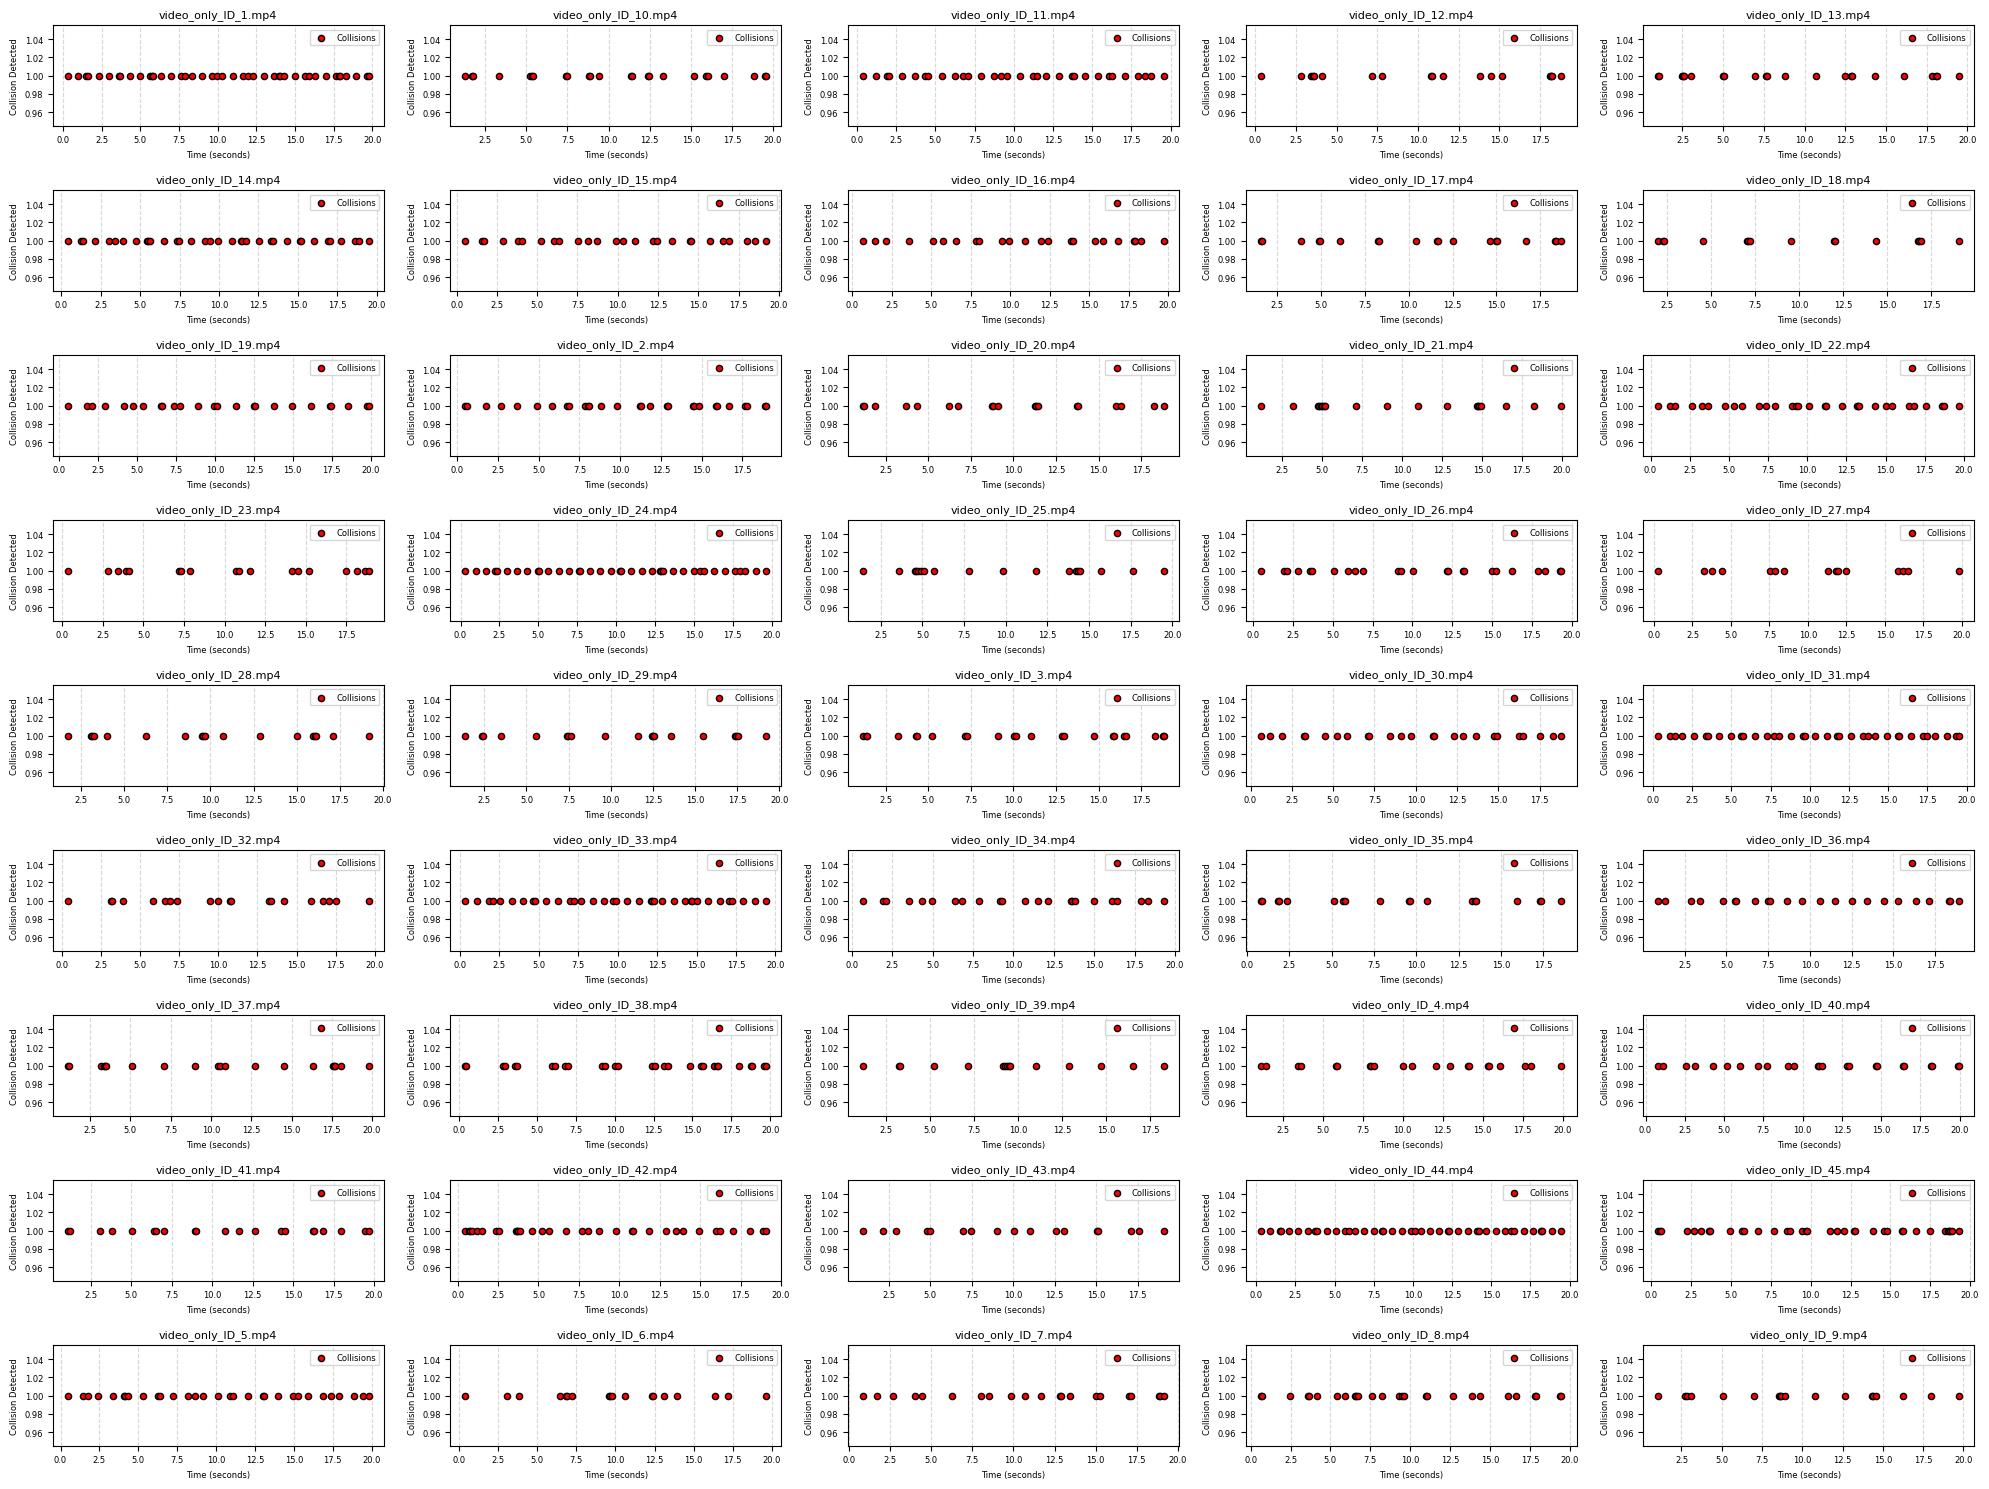

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(9, 5, figsize=(20, 15))
axes = axes.flatten()

for idx, (video_file, collision_times) in enumerate(collision_details.items()):
    if idx >= len(axes): 
        break

    # Plot collision times for the current video
    axes[idx].scatter(collision_times, [1] * len(collision_times), color='red', s=20, label="Collisions", edgecolors='black', zorder=3)
    axes[idx].set_title(video_file, fontsize=8)
    axes[idx].set_xlabel("Time (seconds)", fontsize=6)
    axes[idx].set_ylabel("Collision Detected", fontsize=6)
    axes[idx].tick_params(axis='both', which='major', labelsize=6)
    axes[idx].legend(fontsize=6, loc='upper right')
    axes[idx].grid(axis='x', linestyle='--', alpha=0.5)


for ax in axes[len(collision_details):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


#### Dictionaries made
 collision_details  # for video 
 
audiocollision_processed  #for audio

# For matching Video to audio files 

### Using Dynamic Time Warping (DTW) distance 
 DTW calculates the optimal alignment between two sequences by warping the time axis to match similar events, accommodating sequences that may vary in speed or length.

In [17]:
import numpy as np
from scipy.spatial.distance import cdist

def dtw_distance(seq1, seq2):
    n, m = len(seq1), len(seq2)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(seq1[i - 1] - seq2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j],    # insertion
                                         dtw_matrix[i, j - 1],    # deletion
                                         dtw_matrix[i - 1, j - 1]) # match
    return dtw_matrix[n, m]


In [18]:
def find_best_match(video_dict, audio_dict, distance_func):
    matches = {}
    for video_file, video_events in video_dict.items():
        best_match = None
        best_distance = float('inf')
        for audio_file, audio_events in audio_dict.items():
            distance = distance_func(video_events, audio_events)
            if distance < best_distance:
                best_distance = distance
                best_match = audio_file
        matches[video_file] = (best_match, best_distance)
    return matches

# Using DTW
dtw_matches = find_best_match(collision_details, audiocollision_processed, dtw_distance)
print("DTW Matches:", dtw_matches)

DTW Matches: {'video_only_ID_1.mp4': ('audio_only_ID_45.wav', np.float64(1.003333333333337)), 'video_only_ID_10.mp4': ('audio_only_ID_23.wav', np.float64(1.372000000000008)), 'video_only_ID_11.mp4': ('audio_only_ID_20.wav', np.float64(0.8013333333333337)), 'video_only_ID_12.mp4': ('audio_only_ID_24.wav', np.float64(6.310000000000004)), 'video_only_ID_13.mp4': ('audio_only_ID_6.wav', np.float64(1.487333333333335)), 'video_only_ID_14.mp4': ('audio_only_ID_13.wav', np.float64(0.9106666666666644)), 'video_only_ID_15.mp4': ('audio_only_ID_30.wav', np.float64(1.0080000000000031)), 'video_only_ID_16.mp4': ('audio_only_ID_17.wav', np.float64(5.985999999999999)), 'video_only_ID_17.mp4': ('audio_only_ID_4.wav', np.float64(7.228666666666672)), 'video_only_ID_18.mp4': ('audio_only_ID_16.wav', np.float64(0.7286666666666686)), 'video_only_ID_19.mp4': ('audio_only_ID_39.wav', np.float64(0.9853333333333384)), 'video_only_ID_2.mp4': ('audio_only_ID_10.wav', np.float64(6.092666666666666)), 'video_only_I

#### Saving matches obatined in dtw_matches.csv file 

In [28]:
import csv

output_csv_path = "processing_dtw_matches.csv"

# Save dtw_matches to a CSV file
with open(output_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Video File", "Matched Audio File", "DTW Distance"])  # header

    for video_file, (audio_file, distance) in dtw_matches.items():
        writer.writerow([video_file, audio_file, float(distance)]) 

print(f"DTW matches saved to {output_csv_path}")

DTW matches saved to processing_dtw_matches.csv


### For counting if bijective mapping is there or not 

In [30]:
import csv
from collections import Counter

csv_path = "processing_dtw_matches.csv"

video_counts = Counter()
audio_counts = Counter()

with open(csv_path, mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        video_file, audio_file, _ = row
        video_counts[video_file] += 1
        audio_counts[audio_file] += 1

# Check for repeated video or audio files
repeated_videos = {video: count for video, count in video_counts.items() if count > 1}
repeated_audios = {audio: count for audio, count in audio_counts.items() if count > 1}

print("Repeated Videos:", repeated_videos)
print("Repeated Audios:", repeated_audios)

Repeated Videos: {}
Repeated Audios: {'audio_only_ID_24.wav': 2, 'audio_only_ID_17.wav': 2, 'audio_only_ID_4.wav': 2, 'audio_only_ID_10.wav': 2, 'audio_only_ID_12.wav': 2}


# To overcome One-to-many mapping issue 

Implementation of Bijective Mapping using the Hungarian Algorithm

In [21]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist


video_dict = collision_details
audio_dict = audiocollision_processed

# Build Cost Matrix
video_files = list(video_dict.keys())
audio_files = list(audio_dict.keys())
cost_matrix = np.zeros((len(video_files), len(audio_files)))

for i, video_file in enumerate(video_files):
    for j, audio_file in enumerate(audio_files):
        cost_matrix[i, j] = dtw_distance(video_dict[video_file], audio_dict[audio_file])

# Solve Assignment Problem using Hungarian Algorithm
video_indices, audio_indices = linear_sum_assignment(cost_matrix)

# Generate Final Bijective Matching
best_matches = {}
for v_idx, a_idx in zip(video_indices, audio_indices):
    best_matches[video_files[v_idx]] = (audio_files[a_idx], cost_matrix[v_idx, a_idx])

print("Best Matches (Bijective Mapping):", best_matches)


Best Matches (Bijective Mapping): {'video_only_ID_1.mp4': ('audio_only_ID_45.wav', np.float64(1.003333333333337)), 'video_only_ID_10.mp4': ('audio_only_ID_23.wav', np.float64(1.372000000000008)), 'video_only_ID_11.mp4': ('audio_only_ID_20.wav', np.float64(0.8013333333333337)), 'video_only_ID_12.mp4': ('audio_only_ID_2.wav', np.float64(56.775999999999996)), 'video_only_ID_13.mp4': ('audio_only_ID_6.wav', np.float64(1.487333333333335)), 'video_only_ID_14.mp4': ('audio_only_ID_13.wav', np.float64(0.9106666666666644)), 'video_only_ID_15.mp4': ('audio_only_ID_30.wav', np.float64(1.0080000000000031)), 'video_only_ID_16.mp4': ('audio_only_ID_33.wav', np.float64(8.625333333333328)), 'video_only_ID_17.mp4': ('audio_only_ID_1.wav', np.float64(7.8113333333333275)), 'video_only_ID_18.mp4': ('audio_only_ID_16.wav', np.float64(0.7286666666666686)), 'video_only_ID_19.mp4': ('audio_only_ID_39.wav', np.float64(0.9853333333333384)), 'video_only_ID_2.mp4': ('audio_only_ID_42.wav', np.float64(9.0053333333

In [ ]:
import csv

output_csv_path = "processing_Hungarian_dtw_matches.csv"

with open(output_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Audio File", "Video File", "Cost Matrix"])  # Write header

    for video_file, (audio_file, cost) in best_matches.items():
        audio_file_name = audio_file.split(",")[0].strip()
        writer.writerow([audio_file_name, video_file, cost])

print(f"DTW matches saved to {output_csv_path}")

DTW matches saved to processing_Hungarian_dtw_matches.csv


### for checking if it made bijective or not 

In [31]:
import csv
from collections import Counter

csv_path = "processing_Hungarian_dtw_matches.csv"

video_counts = Counter()
audio_counts = Counter()

with open(csv_path, mode='r') as file:
    reader = csv.reader(file)
    next(reader) 
    for row in reader:
        if len(row) == 3:
            video_file, audio_file, _ = row
        elif len(row) == 2:
            video_file, audio_file = row
        else:
            # print(row)
            continue 
        video_counts[video_file] += 1
        audio_counts[audio_file] += 1

# Check for repeated video or audio files
repeated_videos = {video: count for video, count in video_counts.items() if count > 1}
repeated_audios = {audio: count for audio, count in audio_counts.items() if count > 1}

print("Repeated Videos:", repeated_videos)
print("Repeated Audios:", repeated_audios)

Repeated Videos: {}
Repeated Audios: {}


# Heatmap of DTW Cost Matrix

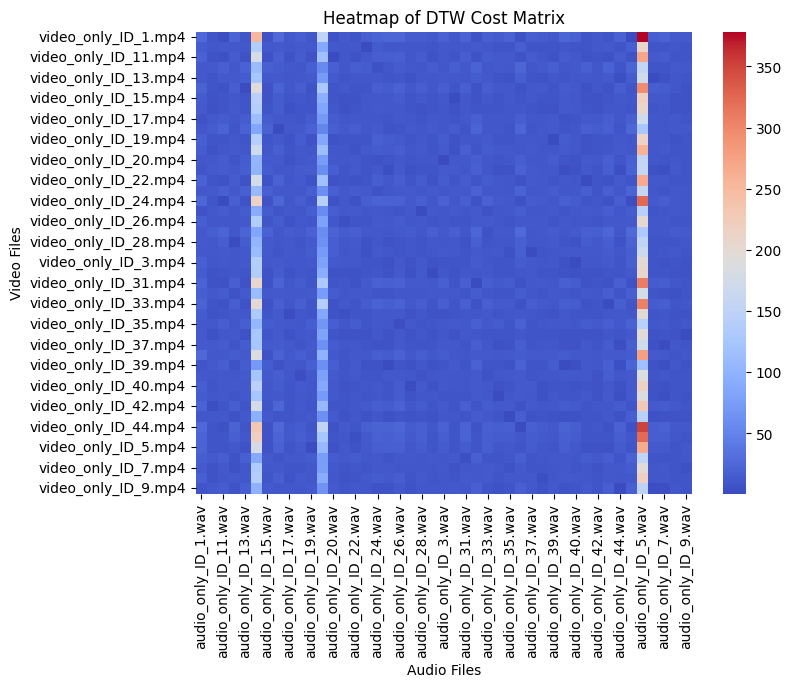

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert cost matrix to DataFrame for visualization
df_cost = pd.DataFrame(cost_matrix, index=video_files, columns=audio_files)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cost, cmap="coolwarm", cbar=True) 
plt.title("Heatmap of DTW Cost Matrix")
plt.xlabel("Audio Files")
plt.ylabel("Video Files")
plt.show()


##### Key Observations:
- ***Dark Cells***: Represent low DTW costs, suggesting a strong match between the video and audio file.
- ***Bright Cells***: Represent high DTW costs, indicating weak or no match.
- ***Patterns***: If certain rows or columns have consistently low or high values, it may indicate that specific videos or audios are better or worse at matching across the dataset.

# Best Matched Video-Audio Pairs with DTW Cost

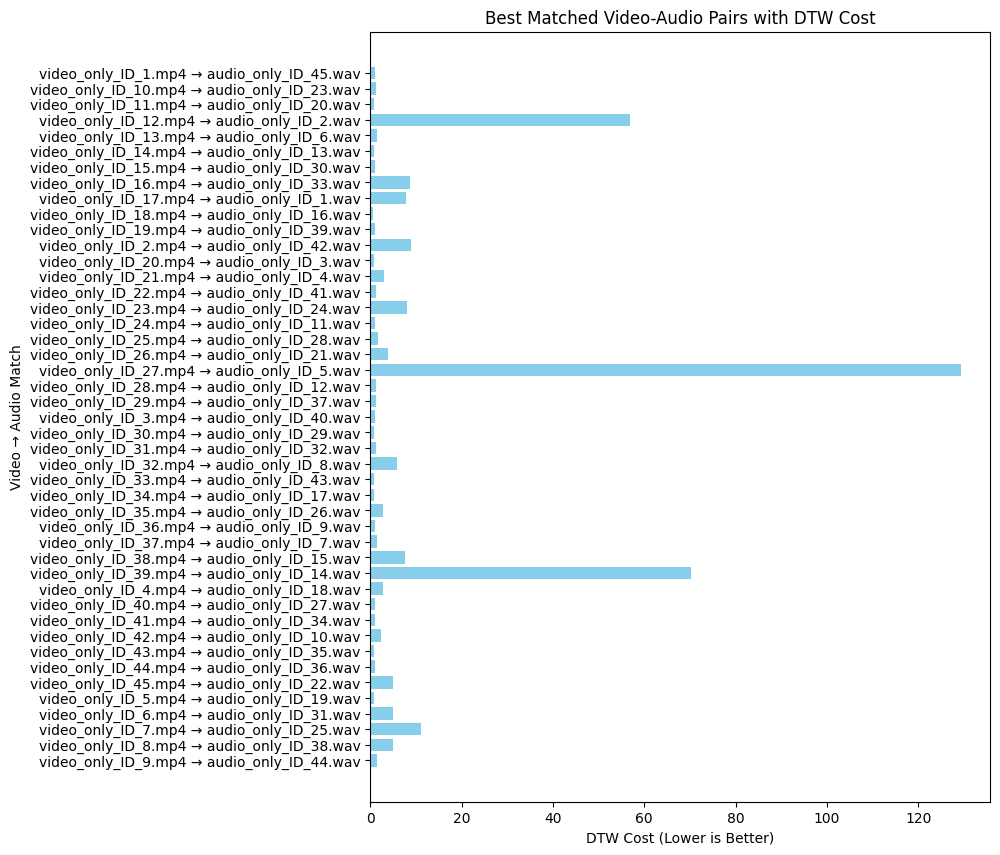

In [25]:
plt.figure(figsize=(8, 10)) 
match_labels = [f"{video} → {audio}" for video, (audio, cost) in best_matches.items()]
match_costs = [cost for _, (_, cost) in best_matches.items()]

plt.barh(match_labels, match_costs, color='skyblue')
plt.xlabel("DTW Cost (Lower is Better)")
plt.ylabel("Video → Audio Match")
plt.title("Best Matched Video-Audio Pairs with DTW Cost")
plt.gca().invert_yaxis()  
plt.show()


# SAving optu matches to csv 

In [ ]:
import csv

output_csv_path = "submit_solution_mapping.csv"

with open(output_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Audio File", "Video File"])  # Write header

    for video_file, (audio_file, cost) in best_matches.items():
        audio_file_name = audio_file.split(",")[0].strip()
        writer.writerow([audio_file_name, video_file])

print(f"DTW matches saved to {output_csv_path}")

DTW matches saved to submit_solution_mapping.csv
